In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
df_org = pd.read_csv("file:///Users/brunasantos/Documents/GitHub/Labs_Bruna/Week%207/DATA_Customer-Churn.csv")

In [ ]:
df_org = df_org.rename(columns=lambda x: x.lower())

,Error_metric,Train,Test
0,Accuracy,0.789315,0.799858
1,Precision,0.649606,0.690476
2,Recall,0.442656,0.460317


,Error_metric,Train,Test
0,Accuracy,0.864750,0.765791
1,Precision,0.793242,0.577419
2,Recall,0.661301,0.473545


,Error_metric,Train,Test
0,Accuracy,0.784523,0.784244
1,Precision,0.647184,0.672897
2,Recall,0.408451,0.380952


n_neighbors = 1
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1031
           1       0.51      0.46      0.48       378

    accuracy                           0.74      1409
   macro avg       0.66      0.65      0.65      1409
weighted avg       0.73      0.74      0.73      1409


n_neighbors = 2
              precision    recall  f1-score   support

           0       0.79      0.93      0.86      1031
           1       0.64      0.32      0.43       378

    accuracy                           0.77      1409
   macro avg       0.71      0.63      0.64      1409
weighted avg       0.75      0.77      0.74      1409


n_neighbors = 3
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1031
           1       0.58      0.47      0.52       378

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.75 

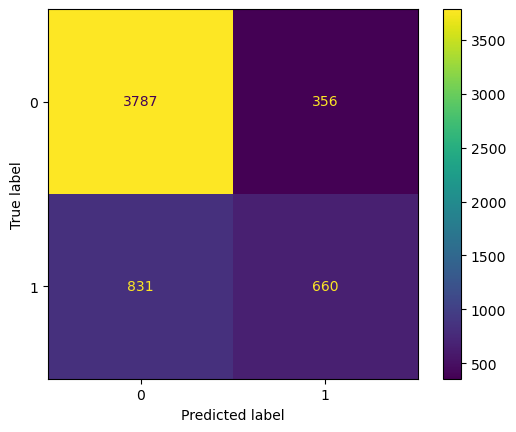

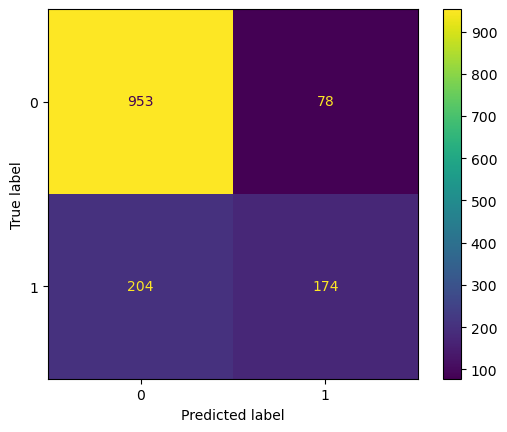

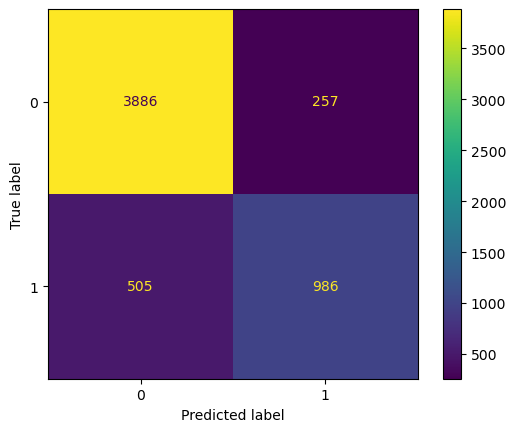

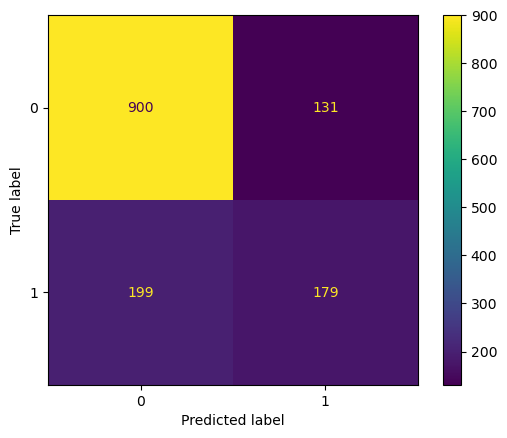

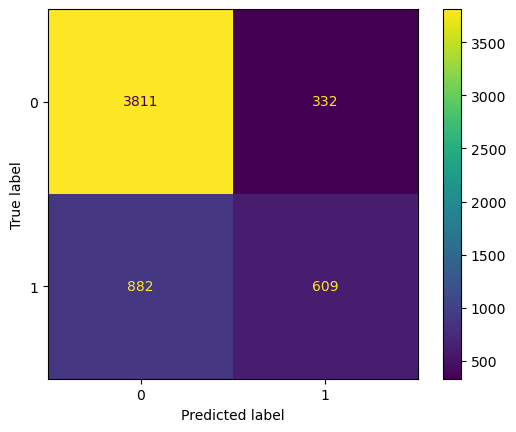

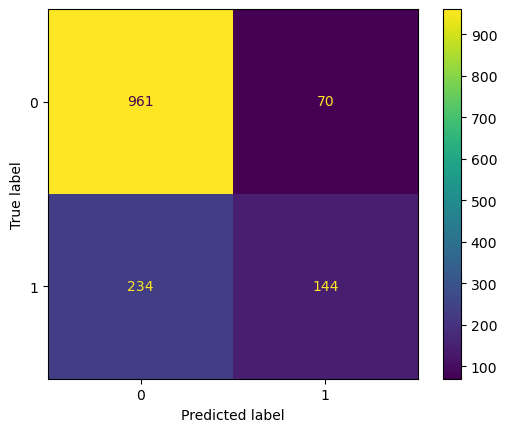

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
# Read the CSV file
df_org = pd.read_csv("file:///Users/brunasantos/Documents/GitHub/Labs_Bruna/Week%207/DATA_Customer-Churn.csv")
# Convert column names to lowercase
df_org = df_org.rename(columns=lambda x: x.lower())
# Select relevant columns
selected_columns = ['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn']
df = df_org[selected_columns].copy()
# Convert 'churn' column values to numeric
df["churn"] = df["churn"].map({'No': 0, 'Yes': 1})
# Convert 'totalcharges' column to float
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
# Handle missing values in 'totalcharges' column
mean_totalcharges = df['totalcharges'].mean()
df['totalcharges'].fillna(mean_totalcharges, inplace=True)
# Split the data into training and test sets
X = df[['tenure', 'seniorcitizen', 'monthlycharges', 'totalcharges']]
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)
# Performance metrics for Logistic Regression
performance_log = pd.DataFrame({'Error_metric': ['Accuracy', 'Precision', 'Recall'],
                                'Train': [accuracy_score(y_train, y_pred_train_log),
                                          precision_score(y_train, y_pred_train_log),
                                          recall_score(y_train, y_pred_train_log)],
                                'Test': [accuracy_score(y_test, y_pred_test_log),
                                         precision_score(y_test, y_pred_test_log),
                                         recall_score(y_test, y_pred_test_log)]})
display(performance_log)
# Confusion matrix for Logistic Regression
cm_train_log = confusion_matrix(y_train, y_pred_train_log)
cm_test_log = confusion_matrix(y_test, y_pred_test_log)
disp_train_log = ConfusionMatrixDisplay(cm_train_log)
disp_train_log.plot()
disp_test_log = ConfusionMatrixDisplay(cm_test_log)
disp_test_log.plot()
# KNN
model = KNeighborsClassifier(n_neighbors=3, weights='uniform')
model.fit(X_train_scaled, y_train)
y_pred_train_knn = model.predict(X_train_scaled)
y_pred_test_knn = model.predict(X_test_scaled)
# Performance metrics for KNN
performance_knn = pd.DataFrame({'Error_metric': ['Accuracy', 'Precision', 'Recall'],
                                'Train': [accuracy_score(y_train, y_pred_train_knn),
                                          precision_score(y_train, y_pred_train_knn),
                                          recall_score(y_train, y_pred_train_knn)],
                                'Test': [accuracy_score(y_test, y_pred_test_knn),
                                         precision_score(y_test, y_pred_test_knn),
                                         recall_score(y_test, y_pred_test_knn)]})
display(performance_knn)
# Confusion matrix for KNN
cm_train_knn = confusion_matrix(y_train, y_pred_train_knn)
cm_test_knn = confusion_matrix(y_test, y_pred_test_knn)
disp_train_knn = ConfusionMatrixDisplay(cm_train_knn)
disp_train_knn.plot()
disp_test_knn = ConfusionMatrixDisplay(cm_test_knn)
disp_test_knn.plot()
# Decision Tree
model_dt = DecisionTreeClassifier(max_depth=3)
model_dt.fit(X_train, y_train)
y_pred_train_dt = model_dt.predict(X_train)
y_pred_test_dt = model_dt.predict(X_test)
# Performance metrics for Decision Tree
performance_dt = pd.DataFrame({'Error_metric': ['Accuracy', 'Precision', 'Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})
display(performance_dt)
# Confusion matrix for Decision Tree
cm_train_dt = confusion_matrix(y_train, y_pred_train_dt)
cm_test_dt = confusion_matrix(y_test, y_pred_test_dt)
disp_train_dt = ConfusionMatrixDisplay(cm_train_dt)
disp_train_dt.plot()
disp_test_dt = ConfusionMatrixDisplay(cm_test_dt)
disp_test_dt.plot()
# Classification reports for different n_neighbors values in KNN
reports = []
for n in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=n, weights='uniform')
    model.fit(X_train_scaled, y_train)
    y_pred_knn = model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred_knn)
    reports.append((n, report))
for n, report in reports:
    print(f"n_neighbors = {n}\n{report}\n")


